In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train = train_df.copy()
test = test_df.copy()
train_test = pd.concat([train,test],axis=0,ignore_index=True)

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
train_test.shape

(12970, 14)

In [7]:
train.shape

(8693, 14)

In [8]:
test.shape

(4277, 13)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
train_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


# EDA

### Null checking

In [12]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [13]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [14]:
train.isnull().sum()*100/train.shape[0]

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

### Categorical value counts

Text(0.5, 1.0, 'Number of Passengers from each Home planet')

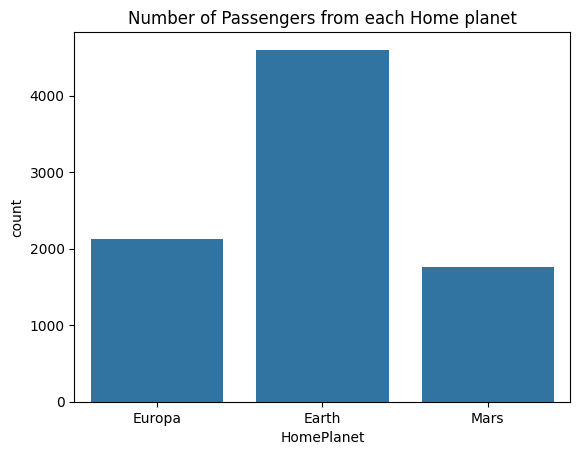

In [15]:
sns.countplot(x='HomePlanet', data=train)
plt.title("Number of Passengers from each Home planet")

In [16]:
train.HomePlanet.value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of passengers having CryoSleep')

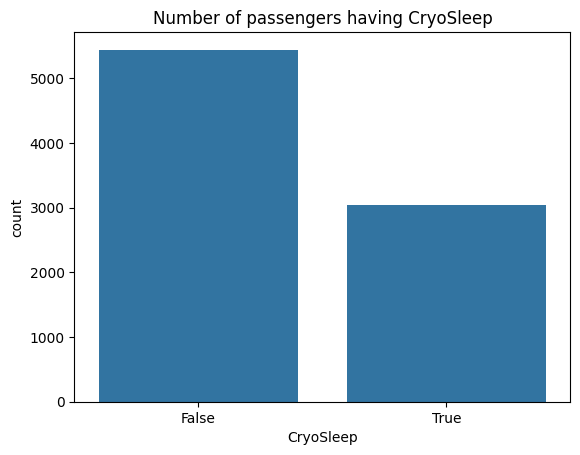

In [17]:
sns.countplot(x='CryoSleep', data=train)
plt.title("Number of passengers having CryoSleep")

Text(0.5, 1.0, 'Number of passengers by their Destination')

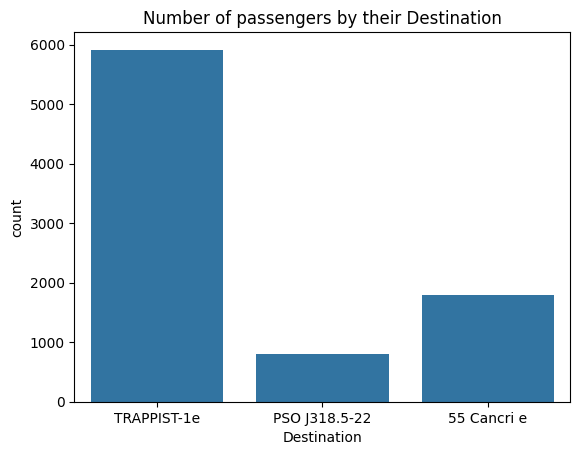

In [18]:
sns.countplot(x='Destination', data=train)
plt.title("Number of passengers by their Destination")

In [19]:
train.Destination.value_counts()*100/train.shape[0]

Destination
TRAPPIST-1e      68.043253
55 Cancri e      20.706315
PSO J318.5-22     9.156793
Name: count, dtype: float64

Text(0.5, 1.0, "Passengers' Age Distribution")

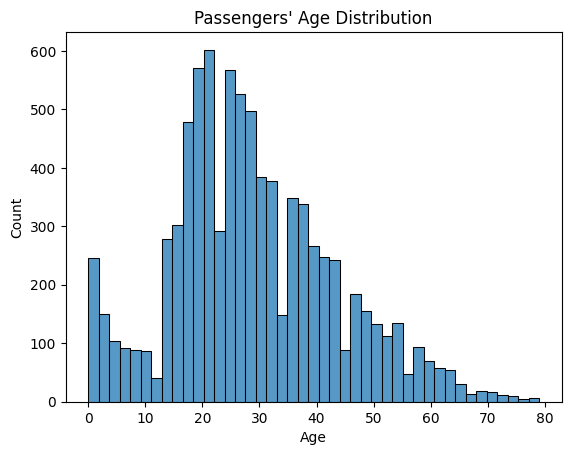

In [20]:
sns.histplot(x='Age', data=train)
plt.title("Passengers' Age Distribution")

Text(0.5, 1.0, 'VIP Passengers')

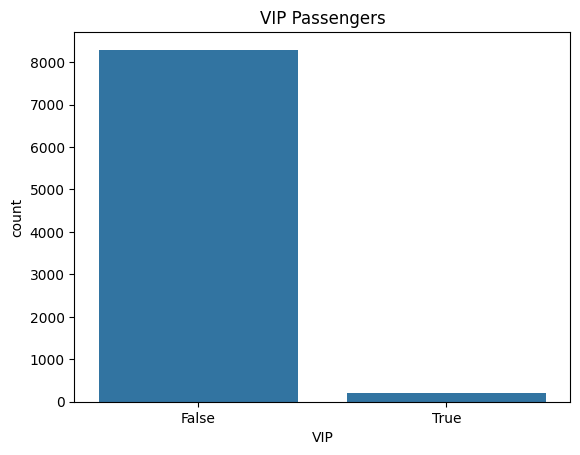

In [21]:
sns.countplot(x='VIP', data=train)
plt.title("VIP Passengers")

In [22]:
train.VIP.value_counts()*100/train.shape[0]

VIP
False    95.375590
True      2.289198
Name: count, dtype: float64

Text(0.5, 1.0, 'Number of passengers Tranported to the Alternate Dimension')

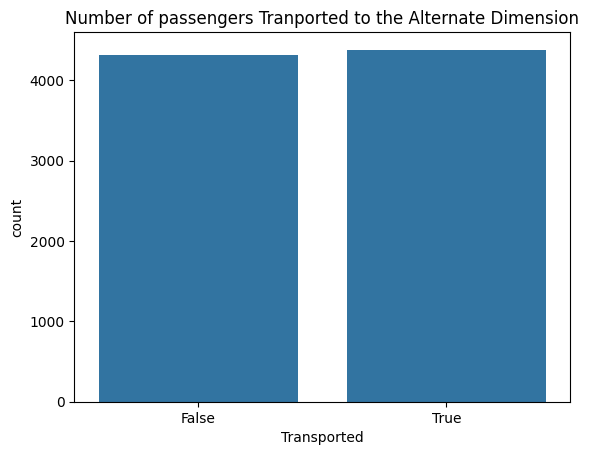

In [23]:
sns.countplot(x='Transported', data=train)
plt.title("Number of passengers Tranported to the Alternate Dimension")

In [24]:
train.Transported.value_counts()*100/train.shape[0]

Transported
True     50.362361
False    49.637639
Name: count, dtype: float64

Text(0.5, 1.0, 'The Impact of VIP to Transported to the Alternate Dimension')

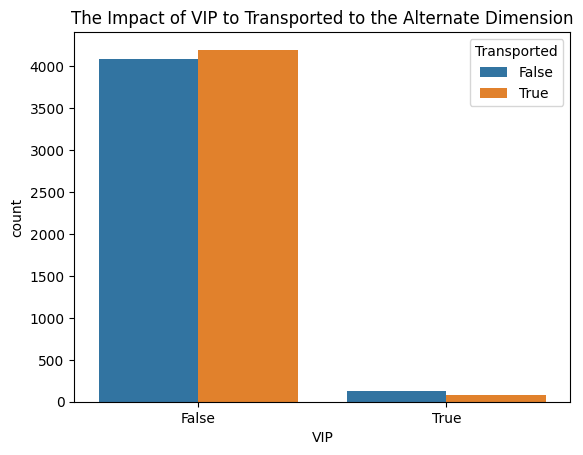

In [25]:
sns.countplot(x='VIP', hue='Transported', data=train)
plt.title("The Impact of VIP to Transported to the Alternate Dimension")

Text(0.5, 1.0, "Passengers' age distribution by home planet")

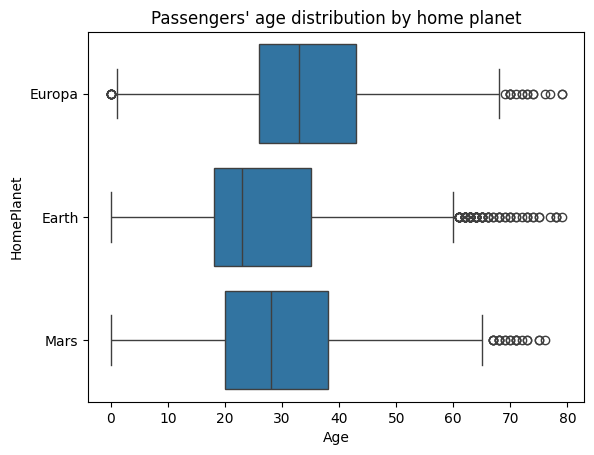

In [26]:
sns.boxplot(x='Age', y='HomePlanet', data=train)
plt.title("Passengers' age distribution by home planet")

Text(0.5, 1.0, 'Impact of age on transport to the Alternate Dimension')

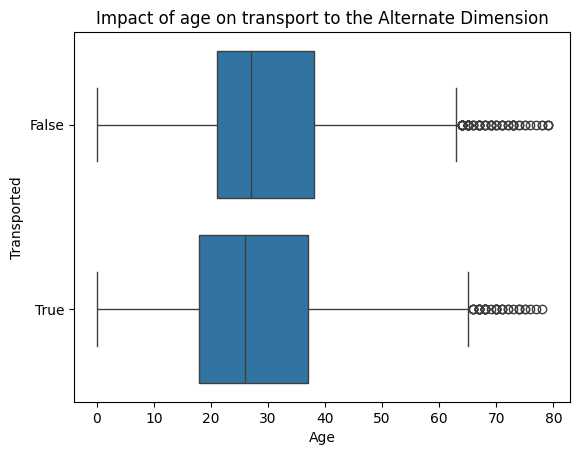

In [27]:
sns.boxplot(x='Age', y=train['Transported'].astype('str'), data=train)
plt.title("Impact of age on transport to the Alternate Dimension")

Text(0.5, 1.0, 'The Impact of Home Planet to Transported to the Alternate Dimension')

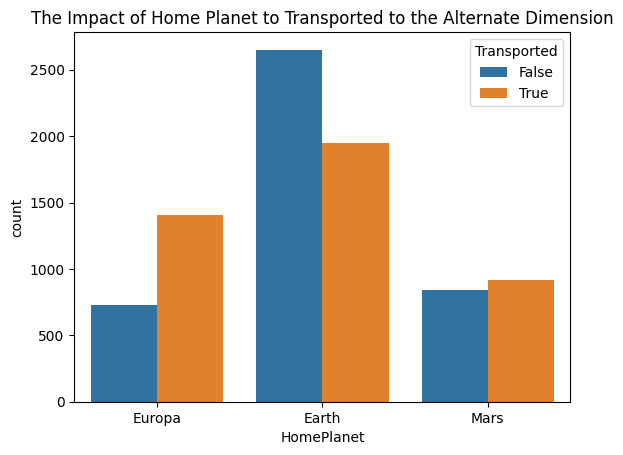

In [28]:
sns.countplot(x='HomePlanet', hue='Transported', data=train)
plt.title("The Impact of Home Planet to Transported to the Alternate Dimension")

Text(0.5, 1.0, 'The Home Planet over the Destination')

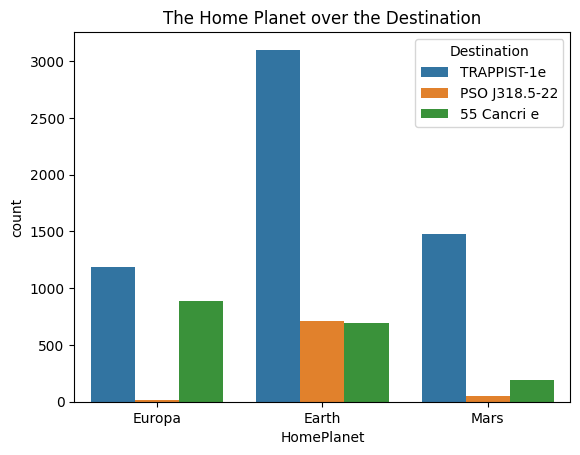

In [29]:
sns.countplot(x='HomePlanet', hue='Destination', data=train)
plt.title("The Home Planet over the Destination")

Text(0.5, 1.0, 'The Impact of Cryo Sleep to the Transported')

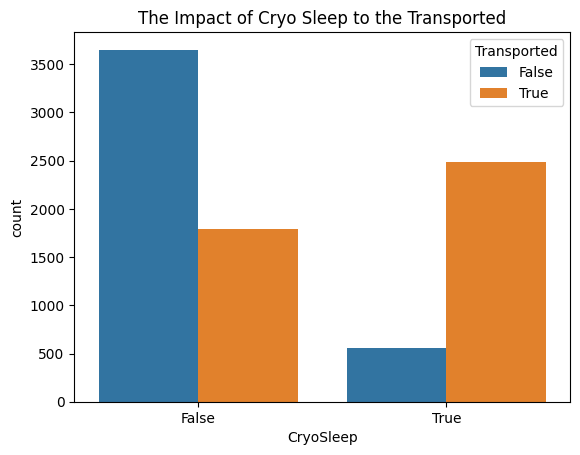

In [30]:
sns.countplot(x='CryoSleep', hue='Transported', data=train)
plt.title("The Impact of Cryo Sleep to the Transported")

## Feature Engineering

In [31]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [32]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [33]:
train['PassengerGroup'] = train.PassengerId.str.split('_',expand=True)[0].astype('int')
test['PassengerGroup'] = test.PassengerId.str.split('_',expand=True)[0].astype('int')

In [34]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3


In [35]:
train['PassengerGroup'].describe()

count    8693.000000
mean     4633.389624
std      2671.028856
min         1.000000
25%      2319.000000
50%      4630.000000
75%      6883.000000
max      9280.000000
Name: PassengerGroup, dtype: float64

In [36]:
test.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerGroup
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19


In [37]:
# HomePlanet
train['HomePlanet'] = train['HomePlanet'].fillna(value='Unknown')
test['HomePlanet'] = test['HomePlanet'].fillna(value='Unknown')

In [38]:
train.HomePlanet.value_counts()

HomePlanet
Earth      4602
Europa     2131
Mars       1759
Unknown     201
Name: count, dtype: int64

In [39]:
# CryoSleep
train['CryoSleep'] = train['CryoSleep'].fillna(value=False)
test['CryoSleep'] = test['CryoSleep'].fillna(value=False)

C:\Users\srjtr\AppData\Local\Temp\ipykernel_8644\874743175.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['CryoSleep'] = train['CryoSleep'].fillna(value=False)
C:\Users\srjtr\AppData\Local\Temp\ipykernel_8644\874743175.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['CryoSleep'] = test['CryoSleep'].fillna(value=False)


In [40]:
# Cabin
train['CabinDeck'] = train['Cabin'].str.split('/',expand=True)[0]
test['CabinDeck'] = test['Cabin'].str.split('/',expand=True)[0]
train['CabinDeck'] = train['CabinDeck'].fillna(value='U')
test['CabinDeck'] = test['CabinDeck'].fillna(value='U')

train['CabinSide'] = train['Cabin'].str.split('/',expand=True)[2]
test['CabinSide'] = test['Cabin'].str.split('/',expand=True)[2]
train['CabinSide'] = train['CabinSide'].fillna(value='U')
test['CabinSide'] = test['CabinSide'].fillna(value='U')

In [41]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,CabinDeck,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,A,S


# EDA cont

<Axes: xlabel='PassengerGroup', ylabel='Count'>

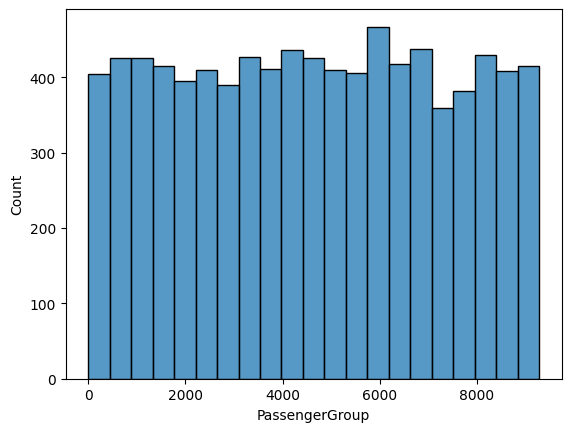

In [42]:
sns.histplot(x='PassengerGroup', data=train)

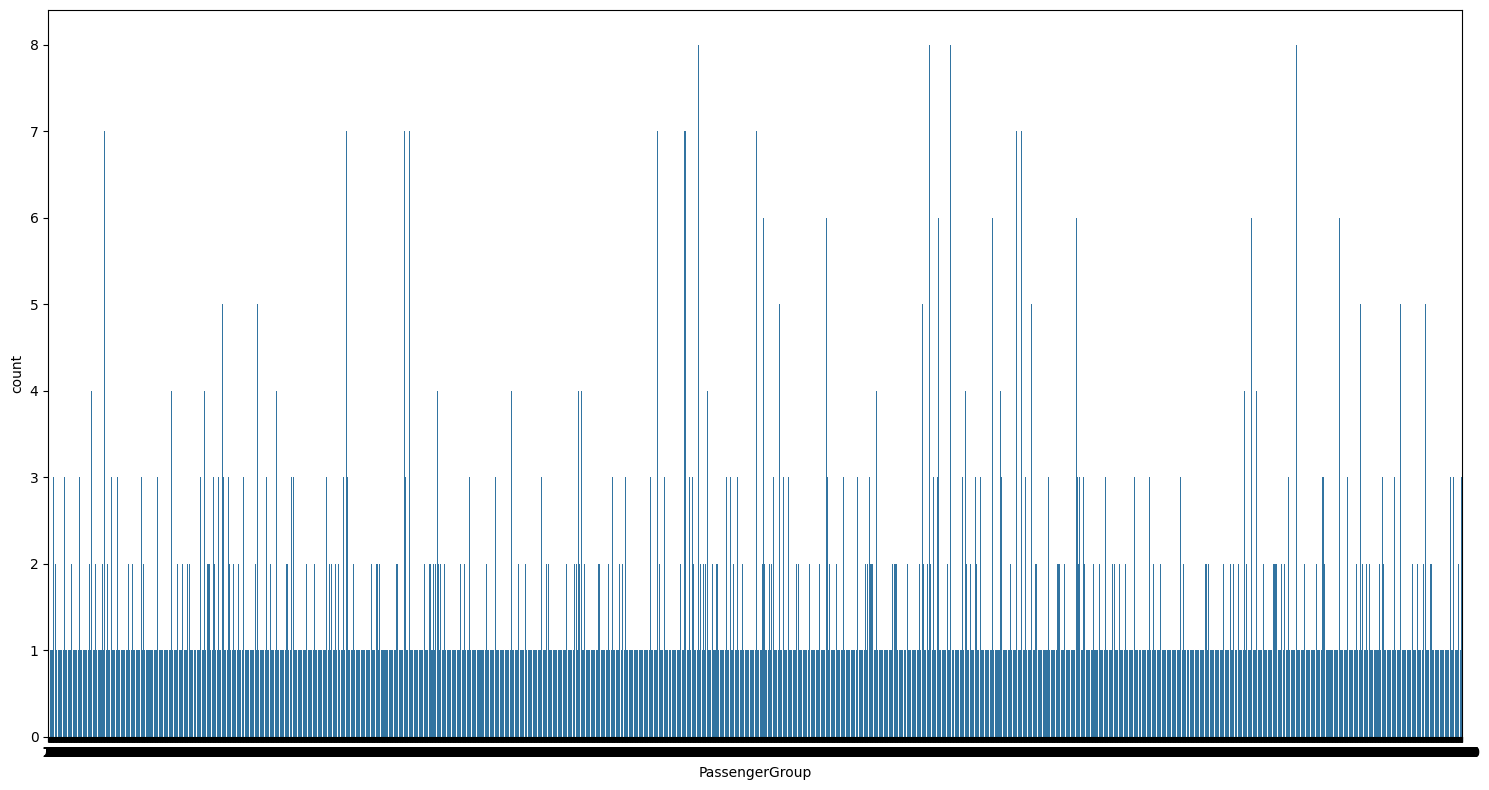

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.countplot(x='PassengerGroup', data=train)
plt.tight_layout()
plt.title("")
plt.show()

Text(0.5, 1.0, 'Passenger counts by Cabin Deck')

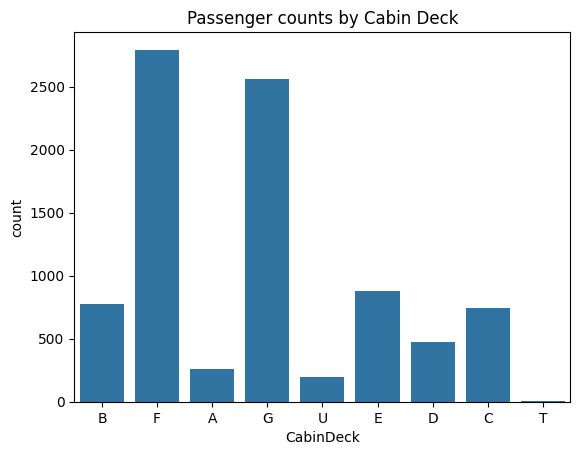

In [44]:
sns.countplot(x='CabinDeck', data=train)
plt.title("Passenger counts by Cabin Deck")

Text(0.5, 1.0, 'The Impact of Cabin Deck to the Transported')

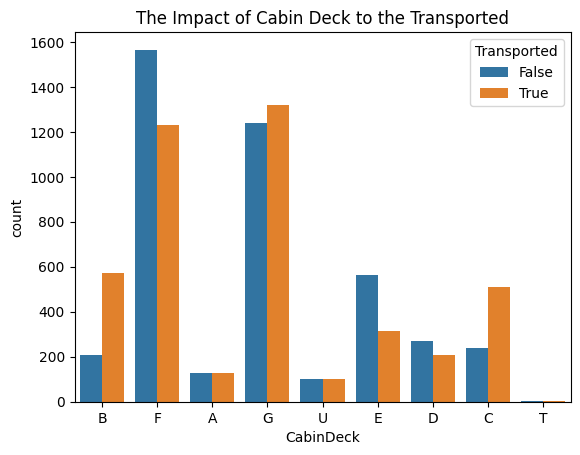

In [45]:
sns.countplot(x='CabinDeck', hue='Transported', data=train)
plt.title("The Impact of Cabin Deck to the Transported")

Text(0.5, 1.0, 'The cabin Deck and the Cryo Sleep')

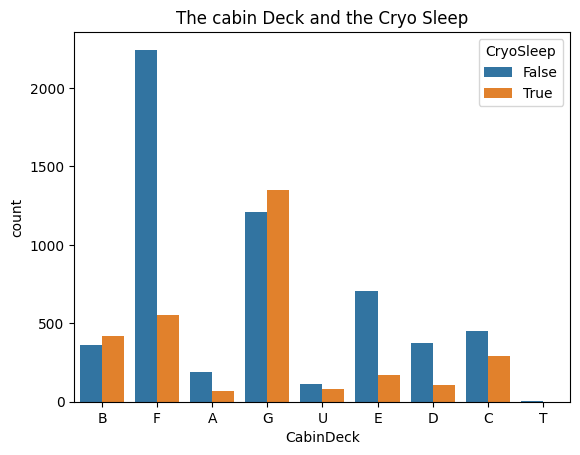

In [46]:
sns.countplot(x='CabinDeck', hue='CryoSleep', data=train)
plt.title("The cabin Deck and the Cryo Sleep")

<Axes: xlabel='CabinDeck', ylabel='count'>

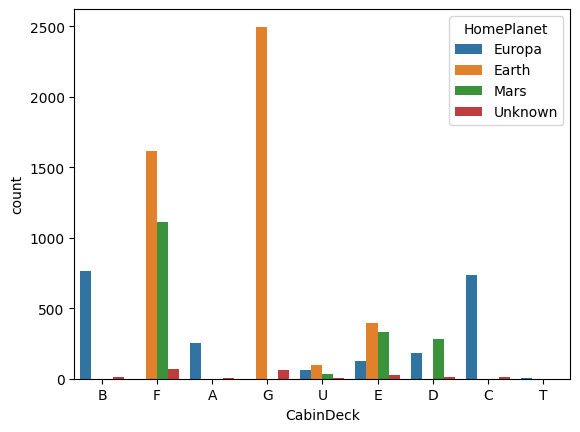

In [47]:
sns.countplot(x='CabinDeck', hue='HomePlanet', data=train)

Text(0.5, 1.0, 'The Cabin Deck and Age of the Passengers')

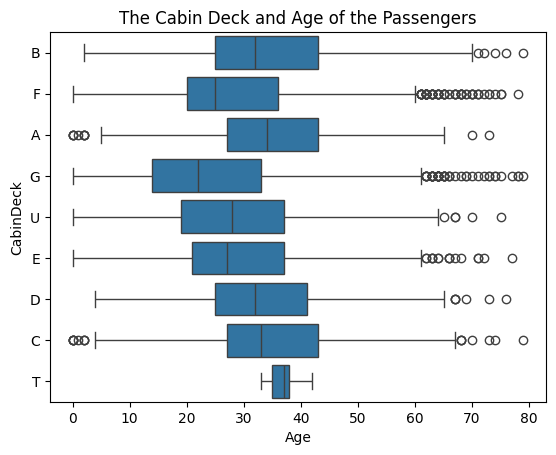

In [48]:
sns.boxplot(y='CabinDeck', x='Age', data=train)
plt.title("The Cabin Deck and Age of the Passengers")

<Axes: xlabel='CabinDeck', ylabel='count'>

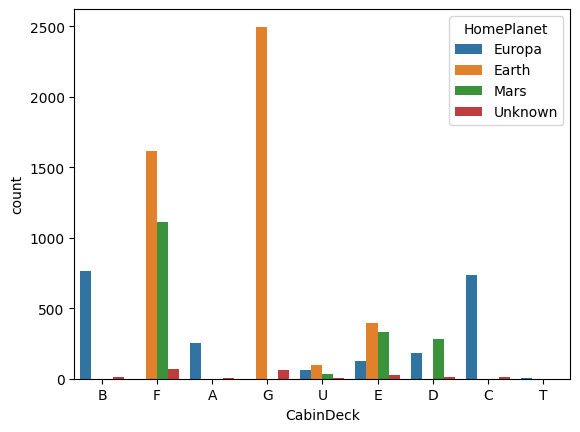

In [49]:
sns.countplot(x='CabinDeck', hue='HomePlanet', data=train)

<Axes: xlabel='CabinDeck', ylabel='count'>

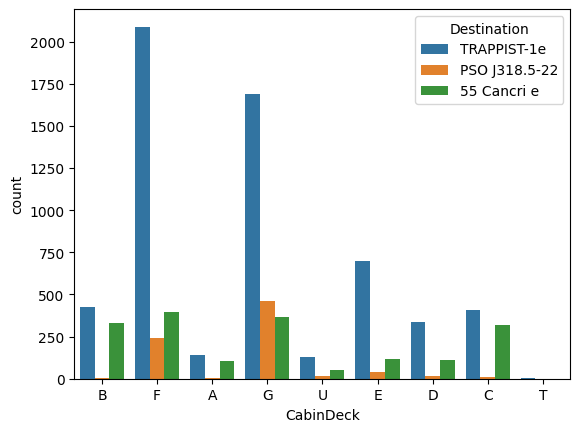

In [50]:
sns.countplot(x='CabinDeck', hue='Destination', data=train)

<Axes: xlabel='CabinDeck', ylabel='count'>

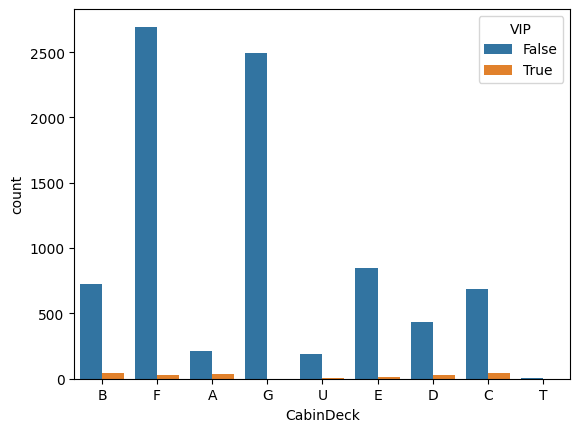

In [51]:
sns.countplot(x='CabinDeck', hue='VIP', data=train)

Text(0.5, 1.0, 'The Passenger count by Cabin Side')

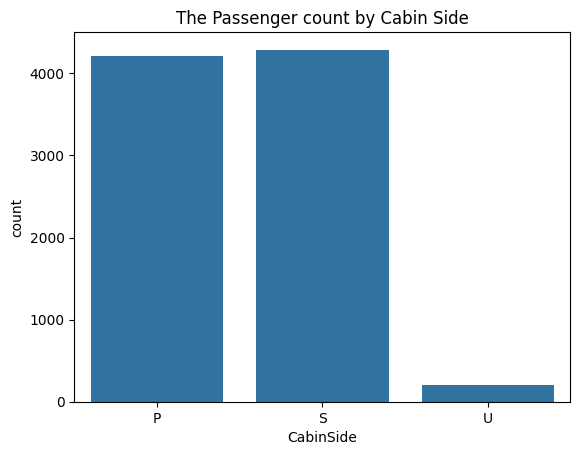

In [52]:
sns.countplot(x='CabinSide', data=train)
plt.title("The Passenger count by Cabin Side")

Text(0.5, 1.0, 'The Cabin Side and the Transported')

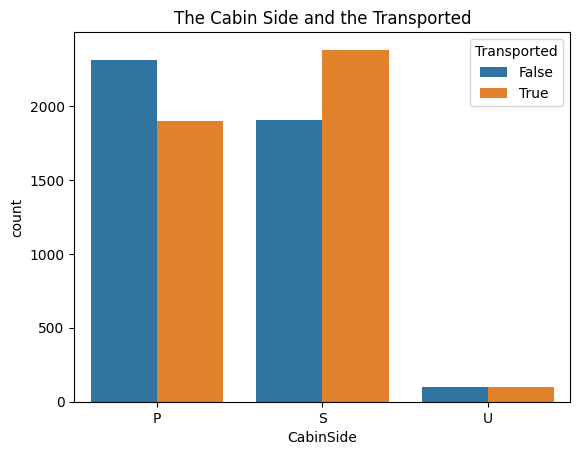

In [53]:
sns.countplot(x='CabinSide', hue='Transported', data=train)
plt.title("The Cabin Side and the Transported")

<Axes: xlabel='CabinSide', ylabel='count'>

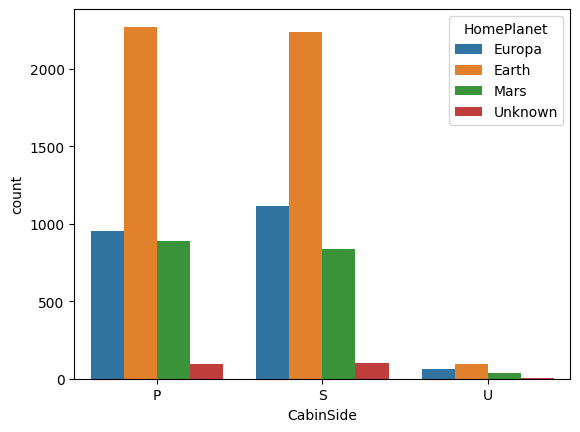

In [54]:
sns.countplot(x='CabinSide', hue='HomePlanet', data=train)

## Preprocssing

In [55]:
# Destination
dest_dic = {'TRAPPIST-1e':'A','55 Cancri e':'B','PSO J318.5-22':'C'}
train['Destination'] = train['Destination'].map(dest_dic)
train['Destination'] = train['Destination'].fillna(value='U')
test['Destination'] = test['Destination'].map(dest_dic)
test['Destination'] = test['Destination'].fillna(value='U')

In [56]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,CabinDeck,CabinSide
0,0001_01,Europa,False,B/0/P,A,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,P
1,0002_01,Earth,False,F/0/S,A,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,F,S
2,0003_01,Europa,False,A/0/S,A,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,A,S


In [57]:
# Age
train['Age'] = train['Age'].fillna(train.groupby('PassengerGroup')['Age'].transform('median'))
train['Age'] = train['Age'].fillna(train.groupby('HomePlanet')['Age'].transform('median'))

test['Age'] = test['Age'].fillna(test.groupby('PassengerGroup')['Age'].transform('median'))
test['Age'] = test['Age'].fillna(test.groupby('HomePlanet')['Age'].transform('median'))

train['Adult'] = 1
train.loc[train['Age']<18, 'Adult'] = 0

test['Adult'] = 1
test.loc[test['Age']<18, 'Adult'] = 0

In [58]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,CabinDeck,CabinSide,Adult
0,0001_01,Europa,False,B/0/P,A,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,P,1
1,0002_01,Earth,False,F/0/S,A,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,F,S,1
2,0003_01,Europa,False,A/0/S,A,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,A,S,1


Text(0.5, 1.0, 'The Passengers and Age')

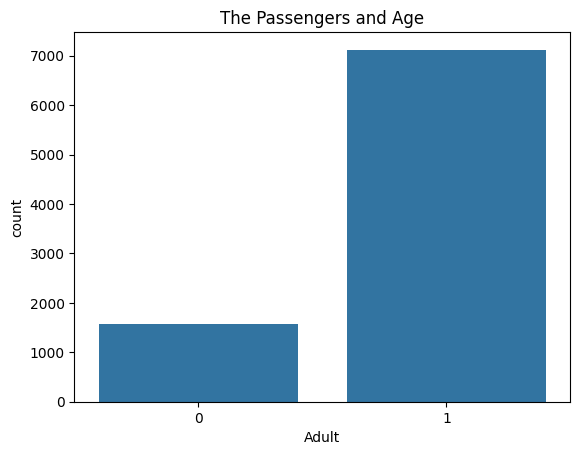

In [59]:
sns.countplot(x='Adult', data=train)
plt.title("The Passengers and Age")

In [60]:
train.Adult.value_counts()*100/train.shape[0]

Adult
1    81.904981
0    18.095019
Name: count, dtype: float64

Text(0.5, 1.0, "The Passengers' Age and Transported")

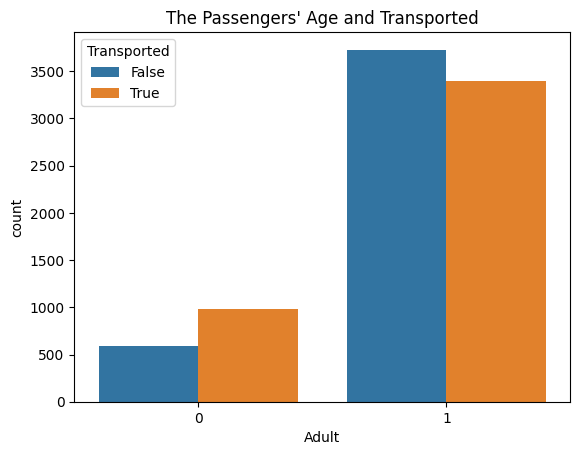

In [61]:
sns.countplot(x='Adult', hue='Transported', data=train)
plt.title("The Passengers' Age and Transported")

<Axes: xlabel='HomePlanet', ylabel='count'>

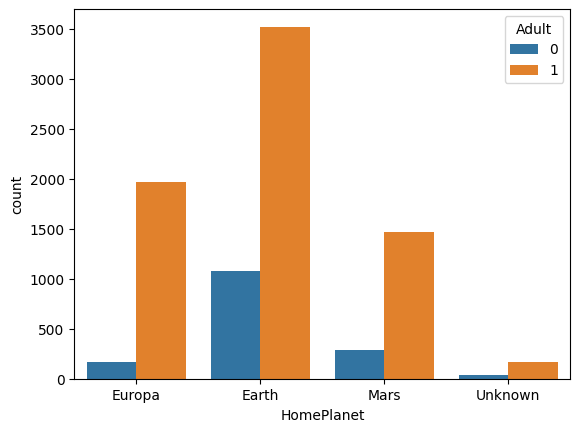

In [62]:
sns.countplot(x='HomePlanet', hue='Adult', data=train)

<Axes: xlabel='Destination', ylabel='count'>

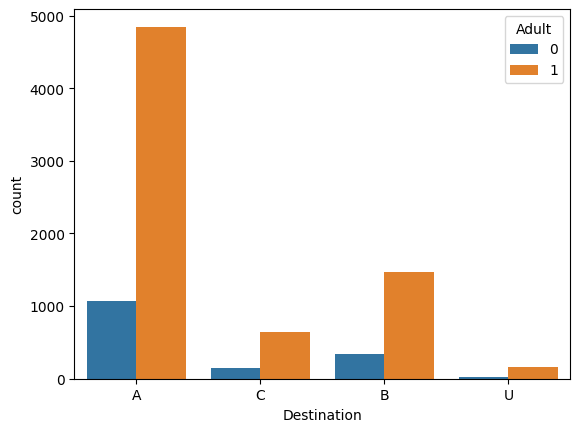

In [63]:
sns.countplot(x='Destination', hue='Adult', data=train)

In [64]:
# VIP
train['VIP'] = train['VIP'].fillna(value=False)
test['VIP'] = test['VIP'].fillna(value=False)

C:\Users\srjtr\AppData\Local\Temp\ipykernel_8644\1254765921.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['VIP'] = train['VIP'].fillna(value=False)
C:\Users\srjtr\AppData\Local\Temp\ipykernel_8644\1254765921.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['VIP'] = test['VIP'].fillna(value=False)


In [65]:
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(value=0)
test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(value=0)

In [66]:
# Total Spend
train['TotalSpend'] = train['RoomService']+train['FoodCourt']+train['ShoppingMall']+train['Spa']+train['VRDeck']
test['TotalSpend'] = test['RoomService']+test['FoodCourt']+test['ShoppingMall']+test['Spa']+test['VRDeck']

In [67]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,CabinDeck,CabinSide,Adult,TotalSpend
0,0001_01,Europa,False,B/0/P,A,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,P,1,0.0
1,0002_01,Earth,False,F/0/S,A,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,F,S,1,736.0
2,0003_01,Europa,False,A/0/S,A,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,A,S,1,10383.0


<Axes: xlabel='TotalSpend', ylabel='Transported'>

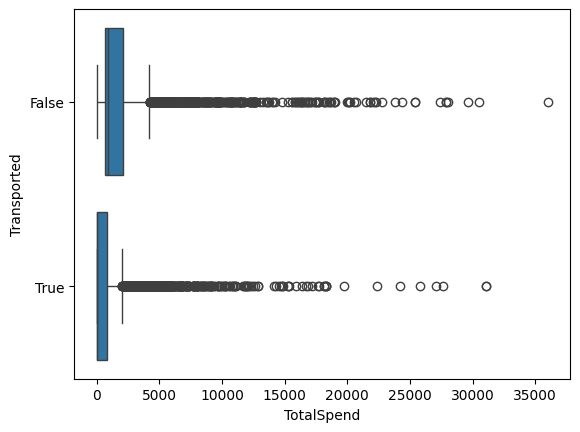

In [68]:
sns.boxplot(x='TotalSpend', y=train['Transported'].astype('str'), data=train)

Text(0.5, 1.0, 'Total Spend based on the Home Planet')

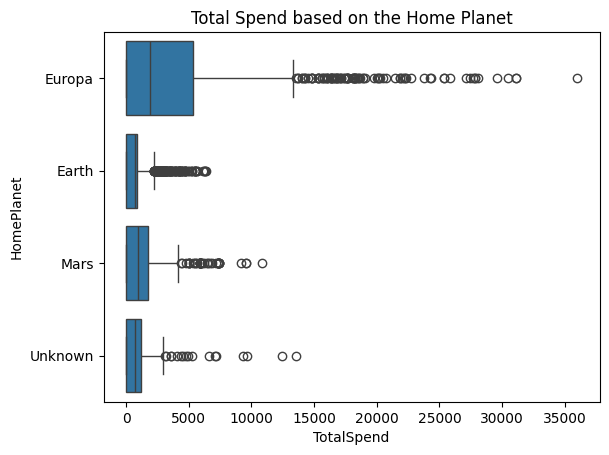

In [69]:
sns.boxplot(x='TotalSpend', y='HomePlanet', data=train)
plt.title("Total Spend based on the Home Planet")

In [70]:
# Name
train['FamilyName'] = train['Name'].str.split(' ',expand=True)[1]
train['FamilyName'] = train['FamilyName'].fillna('Unknown')

test['FamilyName'] = test['Name'].str.split(' ',expand=True)[1]
test['FamilyName'] = test['FamilyName'].fillna('Unknown')

train_test['FamilyName'] = train_test['Name'].str.split(' ',expand=True)[1]
train_test['FamilyName'] = train_test['FamilyName'].fillna('Unknown')

family_name_dict = train_test['FamilyName'].value_counts().to_dict()
family_name_dict['Unknown'] = 0

train['FamilyMember'] = train['FamilyName']
train['FamilyMember'] = train['FamilyMember'].map(family_name_dict)

test['FamilyMember'] = test['FamilyName']
test['FamilyMember'] = test['FamilyMember'].map(family_name_dict)

In [71]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,PassengerGroup,CabinDeck,CabinSide,Adult,TotalSpend,FamilyName,FamilyMember
0,0001_01,Europa,False,B/0/P,A,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,1,B,P,1,0.0,Ofracculy,3
1,0002_01,Earth,False,F/0/S,A,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,2,F,S,1,736.0,Vines,4
2,0003_01,Europa,False,A/0/S,A,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,3,A,S,1,10383.0,Susent,7


In [72]:
train['FamilyMember'].describe()

count    8693.000000
mean        7.061659
std         3.623169
min         0.000000
25%         4.000000
50%         7.000000
75%         9.000000
max        19.000000
Name: FamilyMember, dtype: float64

Text(0.5, 1.0, 'Number of families by member count')

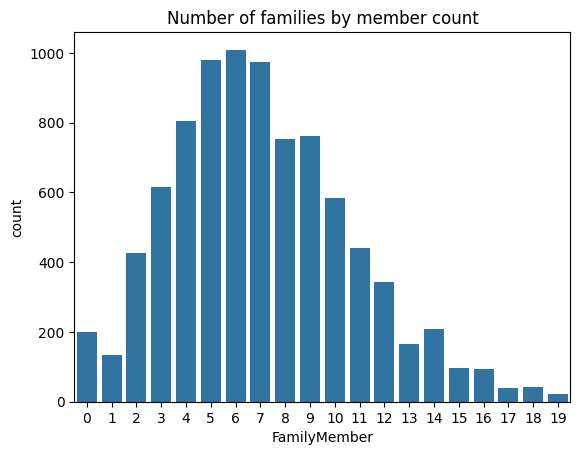

In [73]:
sns.countplot(x='FamilyMember', data=train)
plt.title("Number of families by member count")

Text(0.5, 1.0, 'Number of families by member count and the transorted')

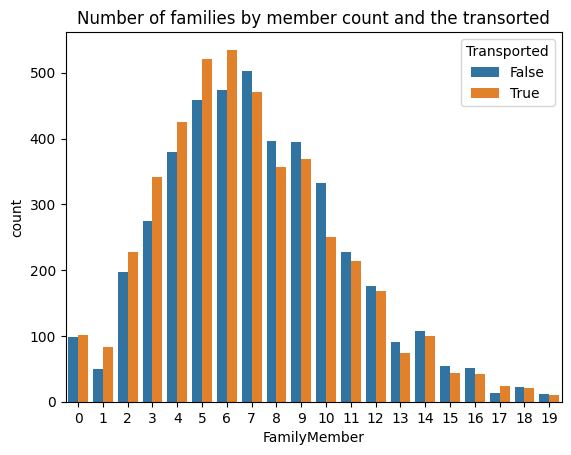

In [74]:
sns.countplot(x='FamilyMember', hue = 'Transported', data=train)
plt.title("Number of families by member count and the transorted")

## Drop columns

In [75]:
train = train.drop(['PassengerId','PassengerGroup','Cabin','Name','FamilyName'],axis=1)
test = test.drop(['PassengerId','PassengerGroup','Cabin','Name','FamilyName'],axis=1)

In [76]:
train.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinSide,Adult,TotalSpend,FamilyMember
0,Europa,False,A,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,1,0.0,3
1,Earth,False,A,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,1,736.0,4
2,Europa,False,A,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,1,10383.0,7


In [77]:
# Convert Bool to Int
train[['CryoSleep','VIP','Transported']] = train[['CryoSleep','VIP','Transported']].astype(int)
test[['CryoSleep','VIP']] = test[['CryoSleep','VIP']].astype(int)

In [78]:
train.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinSide,Adult,TotalSpend,FamilyMember
0,Europa,0,A,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,P,1,0.0,3
1,Earth,0,A,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,S,1,736.0,4
2,Europa,0,A,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,S,1,10383.0,7


In [79]:
test.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,Adult,TotalSpend,FamilyMember
0,Earth,1,A,27.0,0,0.0,0.0,0.0,0.0,0.0,G,S,1,0.0,8
1,Earth,0,A,19.0,0,0.0,9.0,0.0,2823.0,0.0,F,S,1,2832.0,4
2,Europa,1,B,31.0,0,0.0,0.0,0.0,0.0,0.0,C,S,1,0.0,6


In [80]:
train.HomePlanet.value_counts()

HomePlanet
Earth      4602
Europa     2131
Mars       1759
Unknown     201
Name: count, dtype: int64

In [81]:
train.Destination.value_counts()

Destination
A    5915
B    1800
C     796
U     182
Name: count, dtype: int64

In [82]:
train.CabinDeck.value_counts()

CabinDeck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
U     199
T       5
Name: count, dtype: int64

In [83]:
train.CabinSide.value_counts()

CabinSide
S    4288
P    4206
U     199
Name: count, dtype: int64

In [84]:
train.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
CabinDeck       0
CabinSide       0
Adult           0
TotalSpend      0
FamilyMember    0
dtype: int64

## Feature Scaling

In [85]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [86]:
train['Age'] = sc.fit_transform(train['Age'].values.reshape(-1, 1))
test['Age'] = sc.fit_transform(test['Age'].values.reshape(-1, 1))

In [87]:
train.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinSide,Adult,TotalSpend,FamilyMember
0,Europa,0,A,0.493671,0,0.0,0.0,0.0,0.0,0.0,0,B,P,1,0.0,3
1,Earth,0,A,0.303797,0,109.0,9.0,25.0,549.0,44.0,1,F,S,1,736.0,4
2,Europa,0,A,0.734177,1,43.0,3576.0,0.0,6715.0,49.0,0,A,S,1,10383.0,7


In [88]:
test.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,Adult,TotalSpend,FamilyMember
0,Earth,1,A,0.341772,0,0.0,0.0,0.0,0.0,0.0,G,S,1,0.0,8
1,Earth,0,A,0.240506,0,0.0,9.0,0.0,2823.0,0.0,F,S,1,2832.0,4
2,Europa,1,B,0.392405,0,0.0,0.0,0.0,0.0,0.0,C,S,1,0.0,6


In [89]:
train['RoomService'] = sc.fit_transform(train['RoomService'].values.reshape(-1, 1))
test['RoomService'] = sc.fit_transform(test['RoomService'].values.reshape(-1, 1))

In [90]:
train['FoodCourt'] = sc.fit_transform(train['FoodCourt'].values.reshape(-1, 1))
test['FoodCourt'] = sc.fit_transform(test['FoodCourt'].values.reshape(-1, 1))

In [91]:
train['ShoppingMall'] = sc.fit_transform(train['ShoppingMall'].values.reshape(-1, 1))
test['ShoppingMall'] = sc.fit_transform(test['ShoppingMall'].values.reshape(-1, 1))

In [92]:
train['Spa'] = sc.fit_transform(train['Spa'].values.reshape(-1, 1))
test['Spa'] = sc.fit_transform(test['Spa'].values.reshape(-1, 1))

In [93]:
train['VRDeck'] = sc.fit_transform(train['VRDeck'].values.reshape(-1, 1))
test['VRDeck'] = sc.fit_transform(test['VRDeck'].values.reshape(-1, 1))

In [94]:
train['TotalSpend'] = sc.fit_transform(train['TotalSpend'].values.reshape(-1, 1))
test['TotalSpend'] = sc.fit_transform(test['TotalSpend'].values.reshape(-1, 1))

In [95]:
train['FamilyMember'] = sc.fit_transform(train['FamilyMember'].values.reshape(-1, 1))
test['FamilyMember'] = sc.fit_transform(test['FamilyMember'].values.reshape(-1, 1))

In [96]:
train.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinSide,Adult,TotalSpend,FamilyMember
0,Europa,0,A,0.493671,0,0.000000,0.000000,0.000000,0.00000,0.000000,0,B,P,1,0.000000,0.157895
1,Earth,0,A,0.303797,0,0.007608,0.000302,0.001064,0.02450,0.001823,1,F,S,1,0.020452,0.210526
2,Europa,0,A,0.734177,1,0.003001,0.119948,0.000000,0.29967,0.002030,0,A,S,1,0.288521,0.368421


In [97]:
test.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,Adult,TotalSpend,FamilyMember
0,Earth,1,A,0.341772,0,0.0,0.000000,0.0,0.00000,0.0,G,S,1,0.00000,0.421053
1,Earth,0,A,0.240506,0,0.0,0.000356,0.0,0.14226,0.0,F,S,1,0.08412,0.210526
2,Europa,1,B,0.392405,0,0.0,0.000000,0.0,0.00000,0.0,C,S,1,0.00000,0.315789


In [98]:
train.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
CabinDeck       0
CabinSide       0
Adult           0
TotalSpend      0
FamilyMember    0
dtype: int64

## Encoding

In [99]:
train['HomePlanet'] = train['HomePlanet'].map({'Earth': 0, 'Europa': 1, 'Mars':2, 'Unknown':3})
test['HomePlanet'] = test['HomePlanet'].map({'Earth': 0, 'Europa': 1, 'Mars':2, 'Unknown':3})

In [100]:
train.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinSide,Adult,TotalSpend,FamilyMember
0,1,0,A,0.493671,0,0.000000,0.000000,0.000000,0.00000,0.000000,0,B,P,1,0.000000,0.157895
1,0,0,A,0.303797,0,0.007608,0.000302,0.001064,0.02450,0.001823,1,F,S,1,0.020452,0.210526
2,1,0,A,0.734177,1,0.003001,0.119948,0.000000,0.29967,0.002030,0,A,S,1,0.288521,0.368421


In [101]:
test.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,Adult,TotalSpend,FamilyMember
0,0,1,A,0.341772,0,0.0,0.000000,0.0,0.00000,0.0,G,S,1,0.00000,0.421053
1,0,0,A,0.240506,0,0.0,0.000356,0.0,0.14226,0.0,F,S,1,0.08412,0.210526
2,1,1,B,0.392405,0,0.0,0.000000,0.0,0.00000,0.0,C,S,1,0.00000,0.315789


In [102]:
train.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
CabinDeck       0
CabinSide       0
Adult           0
TotalSpend      0
FamilyMember    0
dtype: int64

In [103]:
train['Destination'] = train['Destination'].map({'A': 0, 'B': 1, 'C':2, 'U':3})
test['Destination'] = test['Destination'].map({'A': 0, 'B': 1, 'C':2, 'U':3})

In [104]:
train.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinSide,Adult,TotalSpend,FamilyMember
0,1,0,0,0.493671,0,0.000000,0.000000,0.000000,0.00000,0.000000,0,B,P,1,0.000000,0.157895
1,0,0,0,0.303797,0,0.007608,0.000302,0.001064,0.02450,0.001823,1,F,S,1,0.020452,0.210526
2,1,0,0,0.734177,1,0.003001,0.119948,0.000000,0.29967,0.002030,0,A,S,1,0.288521,0.368421


<Axes: xlabel='Adult', ylabel='count'>

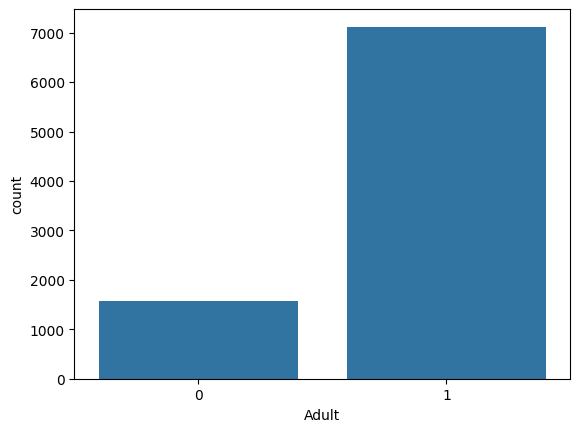

In [105]:
sns.countplot(x='Adult', data=train)

<Axes: xlabel='Transported', ylabel='count'>

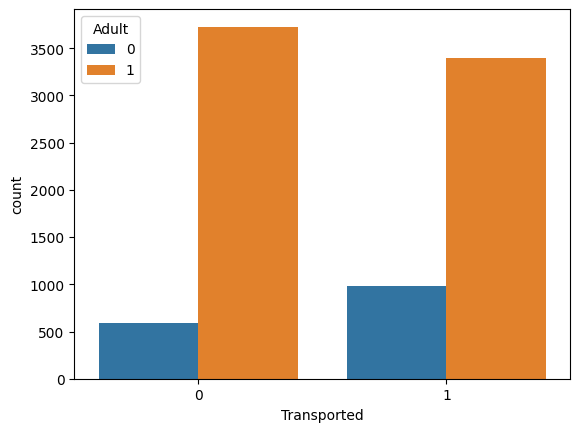

In [106]:
sns.countplot(x='Transported', hue='Adult', data=train)

<Axes: xlabel='CabinDeck', ylabel='count'>

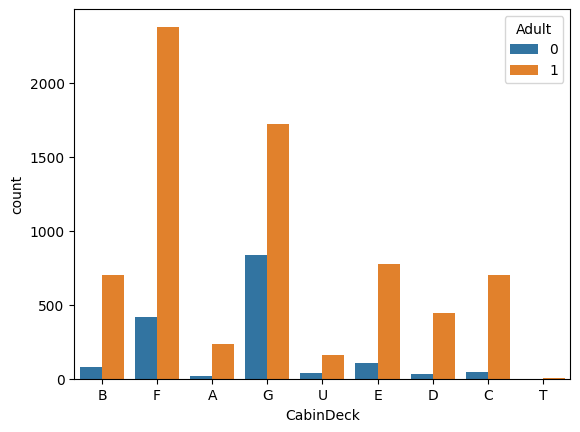

In [107]:
sns.countplot(x='CabinDeck', hue='Adult', data=train)

In [108]:
train.Destination.value_counts()

Destination
0    5915
1    1800
2     796
3     182
Name: count, dtype: int64

In [109]:
test.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,Adult,TotalSpend,FamilyMember
0,0,1,0,0.341772,0,0.0,0.000000,0.0,0.00000,0.0,G,S,1,0.00000,0.421053
1,0,0,0,0.240506,0,0.0,0.000356,0.0,0.14226,0.0,F,S,1,0.08412,0.210526
2,1,1,1,0.392405,0,0.0,0.000000,0.0,0.00000,0.0,C,S,1,0.00000,0.315789


In [110]:
train['CabinDeck'] = train['CabinDeck'].map({'A': 0, 'B': 1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7, 'U':8})
test['CabinDeck'] = test['CabinDeck'].map({'A': 0, 'B': 1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7, 'U':8})

In [111]:
train.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinSide,Adult,TotalSpend,FamilyMember
0,1,0,0,0.493671,0,0.000000,0.000000,0.000000,0.00000,0.000000,0,1,P,1,0.000000,0.157895
1,0,0,0,0.303797,0,0.007608,0.000302,0.001064,0.02450,0.001823,1,5,S,1,0.020452,0.210526
2,1,0,0,0.734177,1,0.003001,0.119948,0.000000,0.29967,0.002030,0,0,S,1,0.288521,0.368421


In [112]:
test.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,Adult,TotalSpend,FamilyMember
0,0,1,0,0.341772,0,0.0,0.000000,0.0,0.00000,0.0,6,S,1,0.00000,0.421053
1,0,0,0,0.240506,0,0.0,0.000356,0.0,0.14226,0.0,5,S,1,0.08412,0.210526
2,1,1,1,0.392405,0,0.0,0.000000,0.0,0.00000,0.0,2,S,1,0.00000,0.315789


In [113]:
train['CabinSide'] = train['CabinSide'].map({'P': 0, 'S': 1, 'U':2})
test['CabinSide'] = test['CabinSide'].map({'P': 0, 'S': 1, 'U':2})

In [114]:
train.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinSide,Adult,TotalSpend,FamilyMember
0,1,0,0,0.493671,0,0.000000,0.000000,0.000000,0.00000,0.000000,0,1,0,1,0.000000,0.157895
1,0,0,0,0.303797,0,0.007608,0.000302,0.001064,0.02450,0.001823,1,5,1,1,0.020452,0.210526
2,1,0,0,0.734177,1,0.003001,0.119948,0.000000,0.29967,0.002030,0,0,1,1,0.288521,0.368421


In [115]:
test.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,Adult,TotalSpend,FamilyMember
0,0,1,0,0.341772,0,0.0,0.000000,0.0,0.00000,0.0,6,1,1,0.00000,0.421053
1,0,0,0,0.240506,0,0.0,0.000356,0.0,0.14226,0.0,5,1,1,0.08412,0.210526
2,1,1,1,0.392405,0,0.0,0.000000,0.0,0.00000,0.0,2,1,1,0.00000,0.315789


In [116]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
CabinDeck       0
CabinSide       0
Adult           0
TotalSpend      0
FamilyMember    0
dtype: int64

In [117]:
train.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
CabinDeck       0
CabinSide       0
Adult           0
TotalSpend      0
FamilyMember    0
dtype: int64

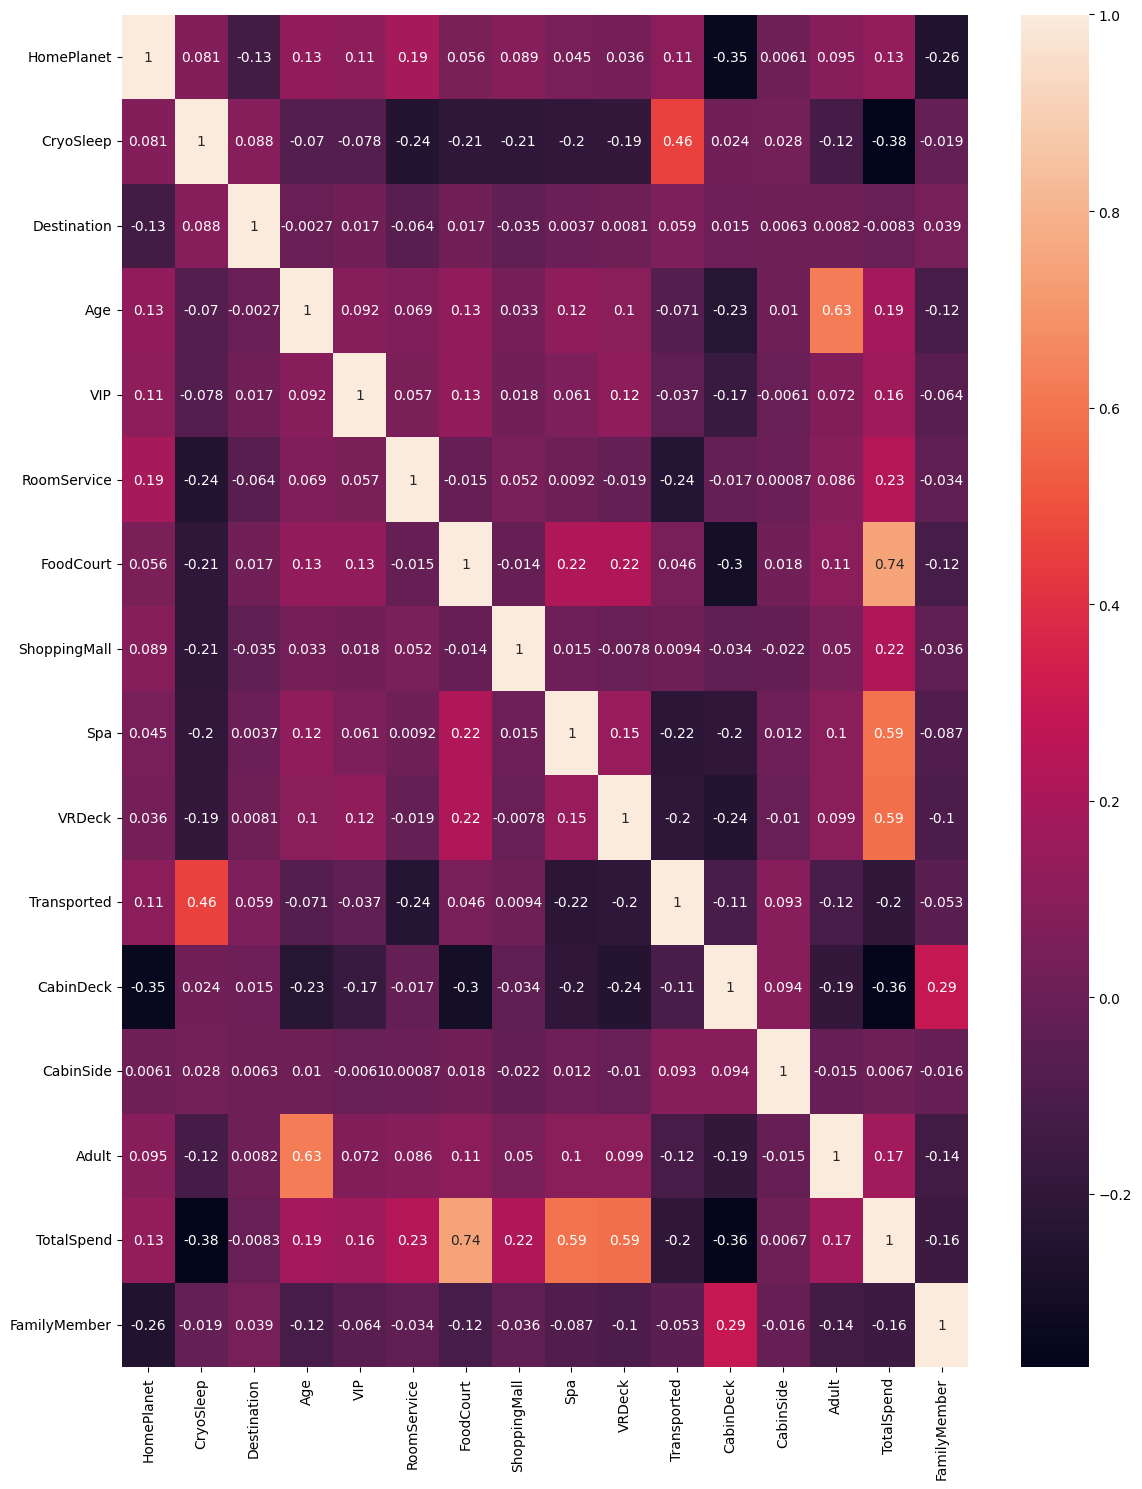

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,15))
sns.heatmap(train.corr(), annot=True)
plt.tight_layout()
plt.title("")
plt.show()

## Splitting

In [119]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
features = train.drop("Transported", axis=1)#x
labels = train["Transported"] #y, class
X_train, X_valid, y_train, y_valid = train_test_split(features, labels, test_size=0.3,
                                                    random_state=101)

## Model Building

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

In [121]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

import numpy as np
import pandas as pd
from sklearn import metrics
from tpot import TPOTClassifier

### Neural Network model

In [122]:
# PyTorch Neural Network

print('Running Neural Network')

# Check device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Convert data to torch tensors
X_train_t = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_t = torch.tensor(y_train.values, dtype=torch.long).to(device)
X_valid_t = torch.tensor(X_valid.values, dtype=torch.float32).to(device)
y_valid_t = torch.tensor(y_valid.values, dtype=torch.long).to(device)

train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

# Define network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden1=256, hidden2=128, num_classes=2):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
    
    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.dropout(out)
        out = self.relu(self.fc2(out))
        out = self.dropout(out)
        out = self.fc3(out)
        return out

input_dim = X_train.shape[1]
model = NeuralNet(input_dim).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Scheduler (without verbose)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=3
)

# Early stopping parameters
patience = 7
best_val_loss = float("inf")
epochs_no_improve = 0
early_stop = False

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_valid_t)
        val_loss = criterion(val_outputs, y_valid_t).item()
    
    # Scheduler step
    scheduler.step(val_loss)

    # Print current LR after scheduler update
    for param_group in optimizer.param_groups:
        current_lr = param_group['lr']
    print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {running_loss/len(train_loader):.4f} | Val Loss: {val_loss:.4f} | LR: {current_lr:.6f}")

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict()  # Save best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            early_stop = True
            break

if early_stop:
    model.load_state_dict(best_model_state)  # Restore best model

# Evaluate
model.eval()
with torch.no_grad():
    outputs = model(X_valid_t)
    _, y_pred_torch = torch.max(outputs, 1)

y_pred_np = y_pred_torch.cpu().numpy()
y_valid_np = y_valid_t.cpu().numpy()

mlp_acc = round(metrics.accuracy_score(y_valid_np, y_pred_np), 4)
mlp_prec = round(metrics.precision_score(y_valid_np, y_pred_np, average='macro'), 4)
mlp_rec = round(metrics.recall_score(y_valid_np, y_pred_np, average='macro'), 4)
mlp_f1 = round(metrics.f1_score(y_valid_np, y_pred_np, average='macro'), 4)
mlp_mse = round(metrics.mean_squared_error(y_valid_np, y_pred_np), 4)

Running Neural Network (PyTorch with GPU + Early Stopping + LR Scheduler)

Using device: cuda
Epoch [1/50] | Train Loss: 0.6311 | Val Loss: 0.5614 | LR: 0.001000
Epoch [2/50] | Train Loss: 0.5594 | Val Loss: 0.5286 | LR: 0.001000
Epoch [3/50] | Train Loss: 0.5416 | Val Loss: 0.5168 | LR: 0.001000
Epoch [4/50] | Train Loss: 0.5268 | Val Loss: 0.5038 | LR: 0.001000
Epoch [5/50] | Train Loss: 0.5186 | Val Loss: 0.4944 | LR: 0.001000
Epoch [6/50] | Train Loss: 0.5148 | Val Loss: 0.4847 | LR: 0.001000
Epoch [7/50] | Train Loss: 0.4979 | Val Loss: 0.4723 | LR: 0.001000
Epoch [8/50] | Train Loss: 0.4909 | Val Loss: 0.4704 | LR: 0.001000
Epoch [9/50] | Train Loss: 0.4843 | Val Loss: 0.4635 | LR: 0.001000
Epoch [10/50] | Train Loss: 0.4822 | Val Loss: 0.4593 | LR: 0.001000
Epoch [11/50] | Train Loss: 0.4807 | Val Loss: 0.4532 | LR: 0.001000
Epoch [12/50] | Train Loss: 0.4813 | Val Loss: 0.4532 | LR: 0.001000
Epoch [13/50] | Train Loss: 0.4690 | Val Loss: 0.4502 | LR: 0.001000
Epoch [14/50] | Tr

### Auto ML model

In [132]:
# AutoML
print('Running AutoML (TPOTClassifier)\n')
tpot = TPOTClassifier(
    generations=5, 
    population_size=20, 
    verbose=2, 
    random_state=42,
    max_time_mins=5
)
tpot.fit(X_train, y_train)
y_pred = tpot.predict(X_valid)
tpot_mse = round(metrics.mean_squared_error(y_valid, y_pred), 4)
tpot_acc = round(metrics.accuracy_score(y_valid, y_pred), 4)
tpot_prec = round(metrics.precision_score(y_valid, y_pred, average='macro'), 4)
tpot_rec = round(metrics.recall_score(y_valid, y_pred, average='macro'), 4)
tpot_f1 = round(metrics.f1_score(y_valid, y_pred, average='macro'), 4)

Running AutoML (TPOTClassifier)



C:\Users\srjtr\anaconda3\envs\py3_13\Lib\site-packages\tpot\tpot_estimator\estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
C:\Users\srjtr\anaconda3\envs\py3_13\Lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 57629 instead
  warnings.warn(


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Generation:   0%|                                                                                | 0/5 [00:00<?, ?it/s]

Generation:  20%|██████████████▏                                                        | 1/5 [12:46<51:06, 766.58s/it]
C:\Users\srjtr\anaconda3\envs\py3_13\Lib\site-packages\sklearn\utils\validation.py:2749:

In [125]:
# Add PyTorch NN + TPOT into results table
model_df = pd.DataFrame({
    'Model': [
        'Neural Network', 
        'AutoML'
    ],
    'Train MSE': [mlp_mse, tpot_mse],
    'Accuracy': [mlp_acc, tpot_acc],
    'Precision': [mlp_prec, tpot_prec],
    'Recall': [mlp_rec, tpot_rec],
    'F1_Score': [mlp_f1, tpot_f1]
})

model_df[['Model', 'Train MSE', 'Accuracy', 'Precision', 'Recall', 'F1_Score']].reset_index(drop=True)

,Model,Train MSE,Accuracy,Precision,Recall,F1_Score
0,Neural Network,0.1863,0.8137,0.8146,0.8135,0.8135
1,AutoML,0.2178,0.7822,0.7833,0.7823,0.7820


In [126]:
# Logistic Regression
print('Running LogisticRegression\n')
logreg = LogisticRegression(max_iter = 600)
scores = cross_val_score(logreg,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
logreg_mse = round(abs(scores.mean()), 4)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_valid)
logreg_acc = round(metrics.accuracy_score(y_valid, y_pred), 4)
logreg_prec = round(metrics.precision_score(y_valid, y_pred, average='macro'), 4)
logreg_rec = round(metrics.recall_score(y_valid, y_pred, average='macro'), 4)
logreg_f1 = round(metrics.f1_score(y_valid, y_pred, average='macro'), 4)


# Decision Tree
print('Running DecisionTreeClassifier\n')
decision_tree = DecisionTreeClassifier()
scores = cross_val_score(decision_tree,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
decision_tree_mse = round(abs(scores.mean()), 4)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_valid)
decision_tree_acc = round(metrics.accuracy_score(y_valid, y_pred), 4)
decision_tree_prec = round(metrics.precision_score(y_valid, y_pred, average='macro'), 4)
decision_tree_rec = round(metrics.recall_score(y_valid, y_pred, average='macro'), 4)
decision_tree_f1 = round(metrics.f1_score(y_valid, y_pred, average='macro'), 4)

# Random Forest
print('Running RandomForestClassifier\n')
random_forest = RandomForestClassifier()
scores = cross_val_score(random_forest,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
random_forest_mse = round(abs(scores.mean()), 4)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_valid)
random_forest_acc = round(metrics.accuracy_score(y_valid, y_pred), 4)
random_forest_prec = round(metrics.precision_score(y_valid, y_pred, average='macro'), 4)
random_forest_rec = round(metrics.recall_score(y_valid, y_pred, average='macro'), 4)
random_forest_f1 = round(metrics.f1_score(y_valid, y_pred, average='macro'), 4)

# XGBoost
print('Running XGBClassifier\n')
xgb = XGBClassifier()
scores = cross_val_score(xgb,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
xgb_mse = round(abs(scores.mean()), 4)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_valid)
xgb_acc = round(metrics.accuracy_score(y_valid, y_pred), 4)
xgb_prec = round(metrics.precision_score(y_valid, y_pred, average='macro'), 4)
xgb_rec = round(metrics.recall_score(y_valid, y_pred, average='macro'), 4)
xgb_f1 = round(metrics.f1_score(y_valid, y_pred, average='macro'), 4)

# GB
print('Running GradientBoostingClassifier\n')
gb = GradientBoostingClassifier()
scores = cross_val_score(gb,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
gb_mse = round(abs(scores.mean()), 4)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_valid)
gb_acc = round(metrics.accuracy_score(y_valid, y_pred), 4)
gb_prec = round(metrics.precision_score(y_valid, y_pred, average='macro'), 4)
gb_rec = round(metrics.recall_score(y_valid, y_pred, average='macro'), 4)
gb_f1 = round(metrics.f1_score(y_valid, y_pred, average='macro'), 4)

# LightGBM
print('Running LGBMClassifier\n')
lgbm = LGBMClassifier()
scores = cross_val_score(lgbm,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
lgbm_mse = round(abs(scores.mean()), 4)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_valid)
lgbm_acc = round(metrics.accuracy_score(y_valid, y_pred), 4)
lgbm_prec = round(metrics.precision_score(y_valid, y_pred, average='macro'), 4)
lgbm_rec = round(metrics.recall_score(y_valid, y_pred, average='macro'), 4)
lgbm_f1 = round(metrics.f1_score(y_valid, y_pred, average='macro'), 4)

# Catboost
print('Running CatBoostClassifier\n')
catb = CatBoostClassifier(verbose = 0)
scores = cross_val_score(catb,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
catb_mse = round(abs(scores.mean()), 4)
catb.fit(X_train, y_train)
y_pred = catb.predict(X_valid)
catb_acc = round(metrics.accuracy_score(y_valid, y_pred), 4)
catb_prec = round(metrics.precision_score(y_valid, y_pred, average='macro'), 4)
catb_rec = round(metrics.recall_score(y_valid, y_pred, average='macro'), 4)
catb_f1 = round(metrics.f1_score(y_valid, y_pred, average='macro'), 4)

# Histogram-based Gradient Boosting
print('Running HistGradientBoostingClassifier\n')
hgb = HistGradientBoostingClassifier()
scores = cross_val_score(hgb,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
hgb_mse = round(abs(scores.mean()), 4)
hgb.fit(X_train, y_train)
y_pred = hgb.predict(X_valid)
hgb_acc = round(metrics.accuracy_score(y_valid, y_pred), 4)
hgb_prec = round(metrics.precision_score(y_valid, y_pred, average='macro'), 4)
hgb_rec = round(metrics.recall_score(y_valid, y_pred, average='macro'), 4)
hgb_f1 = round(metrics.f1_score(y_valid, y_pred, average='macro'), 4)

model_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'GB', 'LightGBM', 'Catboost', 'HistBoost'],
    'Train MSE': [logreg_mse, decision_tree_mse, random_forest_mse, xgb_mse, gb_mse, lgbm_mse, catb_mse, hgb_mse],
    'Accuracy': [logreg_acc, decision_tree_acc, random_forest_acc, xgb_acc, gb_acc, lgbm_acc, catb_acc, hgb_acc],
    'Precision': [logreg_prec, decision_tree_prec, random_forest_prec, xgb_prec, gb_prec, lgbm_prec, catb_prec, hgb_prec],
    'Recall': [logreg_rec, decision_tree_rec, random_forest_rec, xgb_rec, gb_rec, lgbm_rec, catb_rec, hgb_rec],
    'F1_Score': [logreg_f1, decision_tree_f1, random_forest_f1, xgb_f1, gb_f1, lgbm_f1, catb_f1, hgb_f1]
    
})

print(model_df[['Model', 'Train MSE', 'Accuracy', 'Precision', 'Recall', 'F1_Score']].reset_index(drop = True))

Running LogisticRegression

Running DecisionTreeClassifier

Running RandomForestClassifier

Running XGBClassifier

Running GradientBoostingClassifier

Running LGBMClassifier

[LightGBM] [Info] Number of positive: 2456, number of negative: 2412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1651
[LightGBM] [Info] Number of data points in the train set: 4868, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504519 -> initscore=0.018078
[LightGBM] [Info] Start training from score 0.018078
[LightGBM] [Info] Number of positive: 2455, number of negative: 2413
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

In [127]:
# Add PyTorch NN + TPOT into results table
model_df = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 
        'GB', 'LightGBM', 'CatBoost', 'HistBoost', 
        'Neural Network (PyTorch)', 'AutoML (TPOT)'
    ],
    'Train MSE': [
        logreg_mse, decision_tree_mse, random_forest_mse, xgb_mse, gb_mse, 
        lgbm_mse, catb_mse, hgb_mse, mlp_mse, tpot_mse
    ],
    'Accuracy': [
        logreg_acc, decision_tree_acc, random_forest_acc, xgb_acc, gb_acc, 
        lgbm_acc, catb_acc, hgb_acc, mlp_acc, tpot_acc
    ],
    'Precision': [
        logreg_prec, decision_tree_prec, random_forest_prec, xgb_prec, gb_prec, 
        lgbm_prec, catb_prec, hgb_prec, mlp_prec, tpot_prec
    ],
    'Recall': [
        logreg_rec, decision_tree_rec, random_forest_rec, xgb_rec, gb_rec, 
        lgbm_rec, catb_rec, hgb_rec, mlp_rec, tpot_rec
    ],
    'F1_Score': [
        logreg_f1, decision_tree_f1, random_forest_f1, xgb_f1, gb_f1, 
        lgbm_f1, catb_f1, hgb_f1, mlp_f1, tpot_f1
    ]
})

print(model_df[['Model', 'Train MSE', 'Accuracy', 'Precision', 'Recall', 'F1_Score']].reset_index(drop=True))

                      Model  Train MSE  Accuracy  Precision  Recall  F1_Score
0       Logistic Regression     0.2406    0.7650     0.7684  0.7652    0.7643
1             Decision Tree     0.2712    0.7419     0.7420  0.7420    0.7419
2             Random Forest     0.2199    0.7956     0.7985  0.7958    0.7952
3                   XGBoost     0.2094    0.8025     0.8026  0.8025    0.8025
4                        GB     0.2062    0.8025     0.8040  0.8024    0.8022
5                  LightGBM     0.2092    0.8094     0.8100  0.8093    0.8093
6                  CatBoost     0.2033    0.8133     0.8139  0.8132    0.8131
7                 HistBoost     0.2061    0.8113     0.8121  0.8113    0.8112
8  Neural Network (PyTorch)     0.1863    0.8137     0.8146  0.8135    0.8135
9             AutoML (TPOT)     0.2178    0.7822     0.7833  0.7823    0.7820


### Error analysis - Auto ML

C:\Users\srjtr\anaconda3\envs\py3_13\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


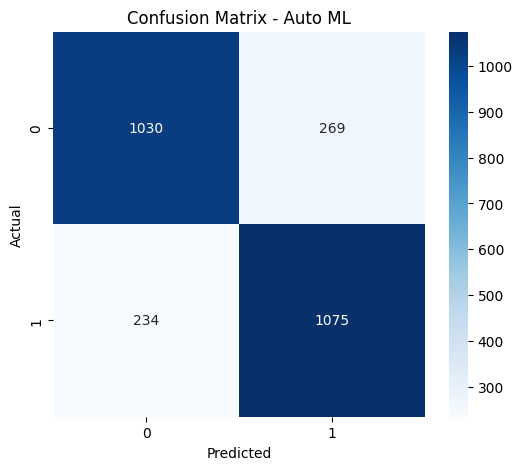

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1299
           1       0.80      0.82      0.81      1309

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608


Total misclassified samples: 503

Sample Misclassifications:
    Index  Actual  Predicted  Confidence
0      3       1          0    0.567328
1      4       1          0    0.770894
2      6       1          0    0.699359
3     19       0          1    0.630918
4     22       0          1    0.526456
5     23       1          0    0.660076
6     29       1          0    0.757634
7     33       0          1    0.647557
8     34       1          0    0.561762
9     37       0          1    0.529292

Lowest confidence misclassifications:
    Index  Actual  Predicted  Confidence
4     22       0          1    0.526456
9     37       0          

In [138]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_np = np.array(tpot.predict(X_valid))
y_valid_np = np.array(y_valid)

# 1. Confusion Matrix
cm = confusion_matrix(y_valid_np, y_pred_np)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_valid_np), yticklabels=np.unique(y_valid_np))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Auto ML")
plt.show()

# 2. Classification Report
print("Classification Report:\n")
print(classification_report(y_valid_np, y_pred_np))

# 3. Identify Misclassified Samples
misclassified_idx = np.where(y_pred_np != y_valid_np)[0]
print(f"\nTotal misclassified samples: {len(misclassified_idx)}")

# Show first 10 misclassified records
error_samples = pd.DataFrame({
    "Index": misclassified_idx[:10],
    "Actual": y_valid_np[misclassified_idx[:10]],
    "Predicted": y_pred_np[misclassified_idx[:10]],
    "Confidence": probs[misclassified_idx[:10]].max(1)[0].cpu().numpy()
})
print("\nSample Misclassifications:\n", error_samples)

# 4. Residual-like Analysis (low confidence predictions)
low_confidence = error_samples.sort_values("Confidence").head(5)
print("\nLowest confidence misclassifications:\n", low_confidence)

### Error analysis - Neural Network

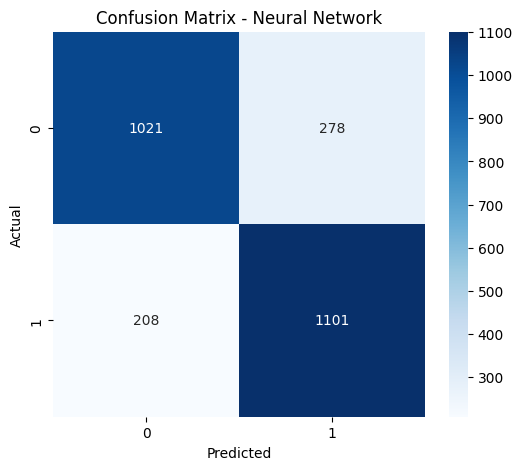

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1299
           1       0.80      0.84      0.82      1309

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608


Total misclassified samples: 486

Sample Misclassifications:
    Index  Actual  Predicted  Confidence
0      4       1          0    0.770894
1      6       1          0    0.699359
2     10       0          1    0.596068
3     14       1          0    0.565759
4     17       1          0    0.552976
5     19       0          1    0.630918
6     22       0          1    0.526456
7     23       1          0    0.660076
8     25       0          1    0.507526
9     29       1          0    0.757634

Lowest confidence misclassifications:
    Index  Actual  Predicted  Confidence
8     25       0          1    0.507526
6     22       0          

In [130]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predicted labels and probabilities from NN
model.eval()
with torch.no_grad():
    outputs = model(X_valid_t)
    probs = torch.softmax(outputs, dim=1)  # class probabilities
    _, y_pred_torch = torch.max(probs, 1)

y_pred_np = y_pred_torch.cpu().numpy()
y_valid_np = y_valid_t.cpu().numpy()

# 1. Confusion Matrix
cm = confusion_matrix(y_valid_np, y_pred_np)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_valid_np), yticklabels=np.unique(y_valid_np))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Neural Network")
plt.show()

# 2. Classification Report
print("Classification Report:\n")
print(classification_report(y_valid_np, y_pred_np))

# 3. Identify Misclassified Samples
misclassified_idx = np.where(y_pred_np != y_valid_np)[0]
print(f"\nTotal misclassified samples: {len(misclassified_idx)}")

# Show first 10 misclassified records
error_samples = pd.DataFrame({
    "Index": misclassified_idx[:10],
    "Actual": y_valid_np[misclassified_idx[:10]],
    "Predicted": y_pred_np[misclassified_idx[:10]],
    "Confidence": probs[misclassified_idx[:10]].max(1)[0].cpu().numpy()
})
print("\nSample Misclassifications:\n", error_samples)

# 4. Residual-like Analysis (low confidence predictions)
low_confidence = error_samples.sort_values("Confidence").head(5)
print("\nLowest confidence misclassifications:\n", low_confidence)

### Error analysis - Random Forest

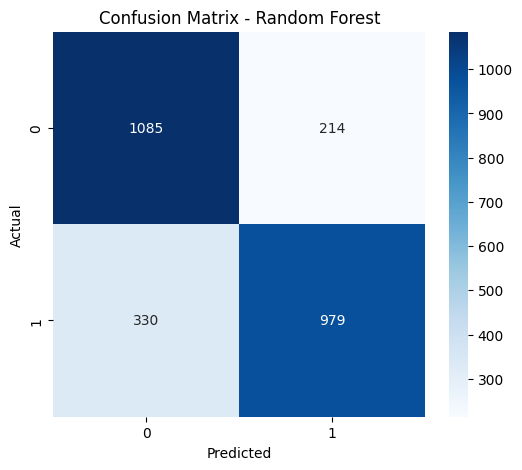

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1299
           1       0.82      0.75      0.78      1309

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608


Total misclassified samples: 544

Sample Misclassifications:
    Index  Actual  Predicted  Confidence
0      3       1          0    0.567328
1      4       1          0    0.770894
2     14       1          0    0.565759
3     17       1          0    0.552976
4     19       0          1    0.630918
5     22       0          1    0.526456
6     23       1          0    0.660076
7     28       1          0    0.551517
8     29       1          0    0.757634
9     33       0          1    0.647557

Lowest confidence misclassifications:
    Index  Actual  Predicted  Confidence
5     22       0          1    0.526456
7     28       1          

In [140]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

random_forest.fit(X_train, y_train)
y_pred_np = np.array(random_forest.predict(X_valid))
y_valid_np = np.array(y_valid)

# 1. Confusion Matrix
cm = confusion_matrix(y_valid_np, y_pred_np)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_valid_np), yticklabels=np.unique(y_valid_np))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# 2. Classification Report
print("Classification Report:\n")
print(classification_report(y_valid_np, y_pred_np))

# 3. Identify Misclassified Samples
misclassified_idx = np.where(y_pred_np != y_valid_np)[0]
print(f"\nTotal misclassified samples: {len(misclassified_idx)}")

# Show first 10 misclassified records
error_samples = pd.DataFrame({
    "Index": misclassified_idx[:10],
    "Actual": y_valid_np[misclassified_idx[:10]],
    "Predicted": y_pred_np[misclassified_idx[:10]],
    "Confidence": probs[misclassified_idx[:10]].max(1)[0].cpu().numpy()
})
print("\nSample Misclassifications:\n", error_samples)

# 4. Residual-like Analysis (low confidence predictions)
low_confidence = error_samples.sort_values("Confidence").head(5)
print("\nLowest confidence misclassifications:\n", low_confidence)

### Error analysis - Hist Boost

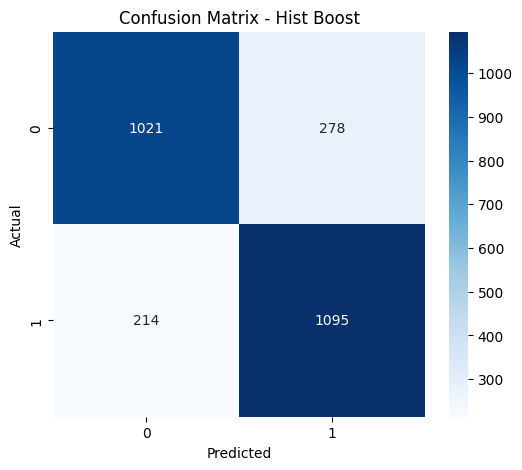

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1299
           1       0.80      0.84      0.82      1309

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608


Total misclassified samples: 492

Sample Misclassifications:
    Index  Actual  Predicted  Confidence
0      4       1          0    0.770894
1     10       0          1    0.596068
2     19       0          1    0.630918
3     22       0          1    0.526456
4     23       1          0    0.660076
5     29       1          0    0.757634
6     32       0          1    0.562695
7     33       0          1    0.647557
8     41       1          0    0.656925
9     43       0          1    0.538247

Lowest confidence misclassifications:
    Index  Actual  Predicted  Confidence
3     22       0          1    0.526456
9     43       0          

In [149]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_np = np.array(hgb.predict(X_valid))
y_valid_np = np.array(y_valid)

# 1. Confusion Matrix
cm = confusion_matrix(y_valid_np, y_pred_np)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_valid_np), yticklabels=np.unique(y_valid_np))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Hist Boost")
plt.show()

# 2. Classification Report
print("Classification Report:\n")
print(classification_report(y_valid_np, y_pred_np))

# 3. Identify Misclassified Samples
misclassified_idx = np.where(y_pred_np != y_valid_np)[0]
print(f"\nTotal misclassified samples: {len(misclassified_idx)}")

# Show first 10 misclassified records
error_samples = pd.DataFrame({
    "Index": misclassified_idx[:10],
    "Actual": y_valid_np[misclassified_idx[:10]],
    "Predicted": y_pred_np[misclassified_idx[:10]],
    "Confidence": probs[misclassified_idx[:10]].max(1)[0].cpu().numpy()
})
print("\nSample Misclassifications:\n", error_samples)

# 4. Residual-like Analysis (low confidence predictions)
low_confidence = error_samples.sort_values("Confidence").head(5)
print("\nLowest confidence misclassifications:\n", low_confidence)

### Error analysis - CAT Boost

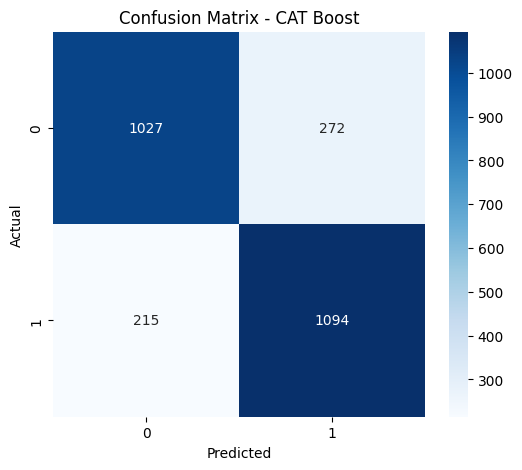

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1299
           1       0.80      0.84      0.82      1309

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608


Total misclassified samples: 487

Sample Misclassifications:
    Index  Actual  Predicted  Confidence
0      4       1          0    0.770894
1      6       1          0    0.699359
2     10       0          1    0.596068
3     14       1          0    0.565759
4     19       0          1    0.630918
5     22       0          1    0.526456
6     23       1          0    0.660076
7     29       1          0    0.757634
8     32       0          1    0.562695
9     33       0          1    0.647557

Lowest confidence misclassifications:
    Index  Actual  Predicted  Confidence
5     22       0          1    0.526456
8     32       0          

In [150]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_np = np.array(catb.predict(X_valid))
y_valid_np = np.array(y_valid)

# 1. Confusion Matrix
cm = confusion_matrix(y_valid_np, y_pred_np)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_valid_np), yticklabels=np.unique(y_valid_np))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CAT Boost")
plt.show()

# 2. Classification Report
print("Classification Report:\n")
print(classification_report(y_valid_np, y_pred_np))

# 3. Identify Misclassified Samples
misclassified_idx = np.where(y_pred_np != y_valid_np)[0]
print(f"\nTotal misclassified samples: {len(misclassified_idx)}")

# Show first 10 misclassified records
error_samples = pd.DataFrame({
    "Index": misclassified_idx[:10],
    "Actual": y_valid_np[misclassified_idx[:10]],
    "Predicted": y_pred_np[misclassified_idx[:10]],
    "Confidence": probs[misclassified_idx[:10]].max(1)[0].cpu().numpy()
})
print("\nSample Misclassifications:\n", error_samples)

# 4. Residual-like Analysis (low confidence predictions)
low_confidence = error_samples.sort_values("Confidence").head(5)
print("\nLowest confidence misclassifications:\n", low_confidence)

## Hyper parameter tuning

In [122]:
#  Grid Search on Catboost
catb = CatBoostClassifier(verbose = 0)
param_grid = {'iterations':[300,400,500,1000],
              'learning_rate':[0.01,0.03,0.05,0.07,0.09],
              'depth':[2,5,10]
             }

grid = GridSearchCV(estimator=catb, param_grid=param_grid, cv=5)
grid.fit(features,labels)
print('Mean accuracy:',grid.score(features,labels))
print('Best hyperparameters:',grid.best_params_)

Mean accuracy: 0.8418267571609341
Best hyperparameters: {'depth': 5, 'iterations': 300, 'learning_rate': 0.07}


In [123]:
catb = CatBoostClassifier(depth=5,iterations=300,learning_rate=0.07,verbose=0)

In [126]:
# Submitting
model=catb
model.fit(features,labels)
predictions = model.predict(test)
# output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Transported': predictions})
# output['Transported'] = output['Transported'].astype('bool')
# output.to_csv('submission.csv', index=False)

In [145]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


def evaluate(model, X_test, y_test):
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')
    print(classification_report(y_test, pred))
    print('Accuracy: %f' % accuracy)
    print('Precision: %f' % precision)
    print('Recall: %f' % recall)
    print('F1 score: %f' % f1)
    print("================================================================")

In [128]:
evaluate(model, features, labels)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4315
           1       0.83      0.87      0.85      4378

    accuracy                           0.84      8693
   macro avg       0.84      0.84      0.84      8693
weighted avg       0.84      0.84      0.84      8693

Accuracy: 0.841827
Precision: 0.842773
Recall: 0.841634
F1 score: 0.841658


In [129]:
hgb = HistGradientBoostingClassifier()
param_grid = {
 'max_iter': [1000,1200,1500],
 'learning_rate': [0.1],
 'max_depth' : [25, 50, 75],
 'l2_regularization': [1.5],
 'scoring': ['f1_micro'],
 }

In [130]:
hgb_grid = GridSearchCV(hgb, param_grid, n_jobs=5, cv=5, scoring='f1_micro',verbose=2, refit=True)
#fit on the grid 
hgb_grid.fit(features,labels)
print('Mean accuracy:',hgb_grid.score(features,labels))
print('Best hyperparameters:',hgb_grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mean accuracy: 0.9508800184056138
Best hyperparameters: {'l2_regularization': 1.5, 'learning_rate': 0.1, 'max_depth': 25, 'max_iter': 1000, 'scoring': 'f1_micro'}


In [142]:
hgb_final=HistGradientBoostingClassifier(l2_regularization= 1.5, learning_rate= 0.1, max_depth= 25, max_iter= 1000, 
                                         scoring= 'f1_micro')

In [143]:
model_hgb=hgb_final
model_hgb.fit(features,labels)
predictions = model_hgb.predict(test)
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Transported': predictions})
output['Transported'] = output['Transported'].astype('bool')
output.to_csv('submission.csv', index=False)

In [146]:
evaluate(model_hgb, X_valid, y_valid)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1299
           1       0.93      0.98      0.95      1309

    accuracy                           0.95      2608
   macro avg       0.95      0.95      0.95      2608
weighted avg       0.95      0.95      0.95      2608

Accuracy: 0.952837
Precision: 0.954348
Recall: 0.952729
F1 score: 0.952790


# Model Saving

In [242]:
import pickle
pickle.dump(model, open('spaceship.pkl', 'wb'))

# Feature Importance Analysis

In [244]:
import shap

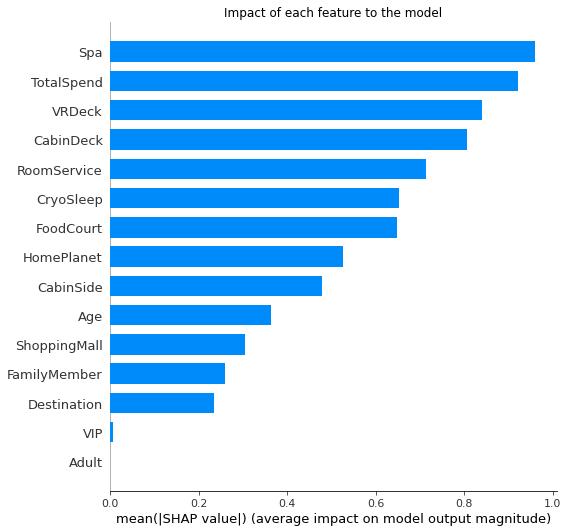

In [246]:
explainer = shap.Explainer(model_hgb)

# Calculate SHAP values
shap_values = explainer(X_train)

# Create a summary plot of feature importances
plt.title("Impact of each feature to the model")
shap.summary_plot(shap_values, X_train, plot_type='bar')
plt.show()

In [138]:
pred = model_hgb.predict(X_valid)
print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1299
           1       0.93      0.98      0.95      1309

    accuracy                           0.95      2608
   macro avg       0.95      0.95      0.95      2608
weighted avg       0.95      0.95      0.95      2608



In [140]:
report_dict = classification_report(y_valid, pred, output_dict = True)

In [141]:
report_dict

{'0': {'precision': 0.9796084828711256,
  'recall': 0.9245573518090839,
  'f1-score': 0.9512871287128712,
  'support': 1299.0},
 '1': {'precision': 0.9290882778581766,
  'recall': 0.9809014514896868,
  'f1-score': 0.9542920847268673,
  'support': 1309.0},
 'accuracy': 0.9528374233128835,
 'macro avg': {'precision': 0.9543483803646511,
  'recall': 0.9527294016493854,
  'f1-score': 0.9527896067198693,
  'support': 2608.0},
 'weighted avg': {'precision': 0.9542515241433841,
  'recall': 0.9528374233128835,
  'f1-score': 0.9527953677551723,
  'support': 2608.0}}

# Tracking and deploy with ML Flow

In [142]:
import mlflow
import mlflow.sklearn

In [145]:
mlflow.set_experiment('Titanic_Spaceship')
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")

with mlflow.start_run():
    mlflow.log_params({'l2_regularization': 1.5, 'learning_rate': 0.1, 'max_depth': 25, 'max_iter': 1000, 'scoring': 'f1_micro'})
    mlflow.log_metrics({
        "accuracy":report_dict['accuracy'], 
        "f1-score_class_0":report_dict['0']['f1-score'],
        "f1-score_class_1":report_dict['1']['f1-score'],
        "f1_score_macro":report_dict['macro avg']['f1-score']
    })
    
    mlflow.sklearn.log_model(model_hgb, "HIST Gradient boost Model Data")

2025/10/02 05:49:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/02 05:49:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run stately-shark-245 at: http://127.0.0.1:5000/#/experiments/305984899500793011/runs/ac195f8c1e32441cb284bd41064329a9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/305984899500793011


In [146]:
model_name = "HIST Gradient boost Model Data"
run_id = "ac195f8c1e32441cb284bd41064329a9"
model_uri = f'runs:/{run_id}/{model_name}'

with mlflow.start_run(run_id = run_id):
    mlflow.register_model(model_uri=model_uri, name = model_name)

Successfully registered model 'HIST Gradient boost Model Data'.
2025/10/02 05:50:55 WARNING mlflow.tracking._model_registry.fluent: Run with id ac195f8c1e32441cb284bd41064329a9 has no artifacts at artifact path 'HIST Gradient boost Model Data', registering model based on models:/m-1f687e711fc94b539d448fbf2605ca0d instead
2025/10/02 05:50:55 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: HIST Gradient boost Model Data, version 1
Created version '1' of model 'HIST Gradient boost Model Data'.


🏃 View run stately-shark-245 at: http://127.0.0.1:5000/#/experiments/305984899500793011/runs/ac195f8c1e32441cb284bd41064329a9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/305984899500793011


In [147]:
current_model_uri = f"models:/{model_name}@prod"
production_model_name = 'titanic-spaceship-model'

client = mlflow.MlflowClient()
client.copy_model_version(src_model_uri=current_model_uri, dst_name=production_model_name)

Successfully registered model 'titanic-spaceship-model'.
Copied version '1' of model 'HIST Gradient boost Model Data' to version '1' of model 'titanic-spaceship-model'.


<ModelVersion: aliases=[], creation_timestamp=1759364629567, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1759364629567, metrics=None, model_id=None, name='titanic-spaceship-model', params=None, run_id='ac195f8c1e32441cb284bd41064329a9', run_link='', source='models:/HIST Gradient boost Model Data/1', status='READY', status_message=None, tags={}, user_id='', version='1'>